In [1]:
import pyarrow.parquet as pq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt
import statistics as st
from scipy import stats
from scipy.stats import f_oneway
#import category_encoders as ce
import statsmodels.api as sm
#import geopandas as gpd
import seaborn as sb

from pandas.plotting import table
from numpy import where
from collections import Counter
from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from scipy.stats import fisher_exact
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score, f1_score, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.feature_selection import chi2,mutual_info_classif, SelectFromModel, SelectPercentile, SelectKBest, f_classif, mutual_info_regression
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate, cross_val_score, GridSearchCV, train_test_split, StratifiedKFold, StratifiedShuffleSplit, RepeatedStratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, PolynomialFeatures
from sklearn.pipeline import Pipeline

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_row', 100)
plt.style.use('ggplot')

In [2]:
Xfiles =[
        "SEASON_2016_2017/X_forecast_13_2016_2017.parquet",
        "SEASON_2017_2018/X_forecast_13_2017_2018.parquet",
        "SEASON_2018_2019/X_forecast_13_2018_2019.parquet",
        "SEASON_2019_2020/X_forecast_13_2019_2020.parquet",
        "SEASON_2020_2021/X_forecast_13_2020_2021.parquet",
        "SEASON_2021_2022/X_forecast_13_2021_2022.parquet",
        "SEASON_2022_2023/X_forecast_13_2022_2023.parquet"
    ]

yfiles = [
        "SEASON_2016_2017/y_farms_forecast_13_2016_2017.parquet", 
        "SEASON_2017_2018/y_farms_forecast_13_2017_2018.parquet",
        "SEASON_2018_2019/y_farms_forecast_13_2018_2019.parquet",
        "SEASON_2019_2020/y_farms_forecast_13_2019_2020.parquet",
        "SEASON_2020_2021/y_farms_forecast_13_2020_2021.parquet",
        "SEASON_2021_2022/y_farms_forecast_13_2021_2022.parquet",
        "SEASON_2022_2023/y_farms_forecast_13_2022_2023.parquet"
    ]

Xtestfiles =[
        "SEASON_2016_2017/X_forecast_13_2016_2017.parquet",
        "SEASON_2017_2018/X_forecast_13_2017_2018.parquet",
        "SEASON_2018_2019/X_forecast_13_2018_2019.parquet",
        "SEASON_2019_2020/X_forecast_13_2019_2020.parquet",
        "SEASON_2020_2021/X_forecast_13_2020_2021.parquet",
        "SEASON_2021_2022/X_forecast_13_2021_2022.parquet",
        "SEASON_2022_2023/X_forecast_13_2022_2023.parquet"
    ]

ytestfiles = [
        "SEASON_2016_2017/y_farms_forecast_13_2016_2017.parquet", 
        "SEASON_2017_2018/y_farms_forecast_13_2017_2018.parquet",
        "SEASON_2018_2019/y_farms_forecast_13_2018_2019.parquet",
        "SEASON_2019_2020/y_farms_forecast_13_2019_2020.parquet",
        "SEASON_2020_2021/y_farms_forecast_13_2020_2021.parquet",
        "SEASON_2021_2022/y_farms_forecast_13_2021_2022.parquet",
        "SEASON_2022_2023/y_farms_forecast_13_2022_2023.parquet"
    ]

files = [
        "SEASON_2016_2017/y_farms_forecast_13_2016_2017.parquet", 
        "SEASON_2017_2018/y_farms_forecast_13_2017_2018.parquet",
        "SEASON_2018_2019/y_farms_forecast_13_2018_2019.parquet",
        "SEASON_2019_2020/y_farms_forecast_13_2019_2020.parquet",
        "SEASON_2020_2021/y_farms_forecast_13_2020_2021.parquet",
        "SEASON_2021_2022/y_farms_forecast_13_2021_2022.parquet",
        "SEASON_2022_2023/y_farms_forecast_13_2022_2023.parquet"
    ]


In [3]:
def load_data(Xfiles, yfiles):
    
    data = pq.read_table(Xfiles)
    data = data.to_pandas()
    data = data.iloc[:,:62]
    
    target = pq.read_table(yfiles)
    target = target.to_pandas()

    full_data_set = data.join(target)
    full_data_set.drop(columns = ['grid_id_to_latest'], inplace = True)
    full_data_set.dropna(inplace = True)    
    
    target = full_data_set['out_farms']
    data = full_data_set.iloc[:,:61]
    
    return data, target

In [4]:
for file in files:
    y_shp = pq.read_table(file).to_pandas()
    y_shp.replace({False: 0, True: 1}, inplace = True)
    print(file, y_shp.value_counts())

SEASON_2016_2017/y_farms_forecast_13_2016_2017.parquet out_farms
0            358734
1                61
Name: count, dtype: int64
SEASON_2017_2018/y_farms_forecast_13_2017_2018.parquet out_farms
0            358795
Name: count, dtype: int64
SEASON_2018_2019/y_farms_forecast_13_2018_2019.parquet out_farms
0            358795
Name: count, dtype: int64
SEASON_2019_2020/y_farms_forecast_13_2019_2020.parquet out_farms
0            359746
1                32
Name: count, dtype: int64
SEASON_2020_2021/y_farms_forecast_13_2020_2021.parquet out_farms
0            358522
1               273
Name: count, dtype: int64
SEASON_2021_2022/y_farms_forecast_13_2021_2022.parquet out_farms
0            358711
1                84
Name: count, dtype: int64
SEASON_2022_2023/y_farms_forecast_13_2022_2023.parquet out_farms
0.0          200484
1.0              48
Name: count, dtype: int64


In [5]:
X, y = load_data(Xfiles, yfiles)
X.replace({False: 0, True: 1}, inplace = True)
y.replace({False: 0, True: 1}, inplace = True)

In [6]:
X

t2m_mean  10m_speed_mean        sp_mean       tp_mean   
grid_id time                                                                  
6.0     2016-12-03  275.664215        5.230152  102399.210938  5.916469e-08  \
        2016-12-04  275.959320        5.120715  102776.312500  1.720321e-06   
        2016-12-05  275.763000        6.675695  102494.617188  1.396083e-06   
        2016-12-06  277.179321        3.782278  102859.609375  4.033866e-06   
        2016-12-07  276.071655        6.923828  102874.929688  8.087070e-05   
...                        ...             ...            ...           ...   
1284.0  2023-01-16  275.895538        4.241505   97966.406250  1.756381e-04   
        2023-01-17  277.417572        5.210972   97015.539062  3.103557e-05   
        2023-01-18  279.389130        6.529541   96899.492188  1.634459e-04   
        2023-01-19  274.246063        2.688436   98112.093750  3.532431e-04   
        2023-01-20  273.438293        4.302091   98723.453125  3.861554e-04   

                          tp_min  10m_direction_freq  lud  count_63  exist_63   
grid_id time                                                                    
6.0     2016-12-03 -4.656613e-10                  14    0       0.0         0  \
        2016-12-04 -4.656613e-10                  19    0       0.0         0   
        2016-12-05 -4.656613e-10                  14    0       0.0         0   
        2016-12-06 -4.656613e-10                   9    0       0.0         0   
        2016-12-07 -4.656613e-10                  12    0       0.0         0   
...                          ...                 ...  ...       ...       ...   
1284.0  2023-01-16  0.000000e+00                  12    0       0.0         0   
        2023-01-17  0.000000e+00                  18    0       0.0         0   
        2023-01-18  0.000000e+00                  10    0       0.0         0   
        2023-01-19  0.000000e+00                  11    0       0.0         0   
        2023-01-20  0.000000e+00                  20    0       0.0         0   

                    count_64  exist_64  count_65  exist_65  count_66   
grid_id time                                                           
6.0     2016-12-03       0.0         0       0.0         0       0.0  \
        2016-12-04       0.0         0       0.0         0       0.0   
        2016-12-05       0.0         0       0.0         0       0.0   
        2016-12-06       0.0         0       0.0         0       0.0   
        2016-12-07       0.0         0       0.0         0       0.0   
...                      ...       ...       ...       ...       ...   
1284.0  2023-01-16       0.0         0       0.0         0       0.0   
        2023-01-17       0.0         0       0.0         0       0.0   
        2023-01-18       0.0         0       0.0         0       0.0   
        2023-01-19       0.0         0       0.0         0       0.0   
        2023-01-20       0.0         0       0.0         0       0.0   

                    exist_66  land_class_10  land_class_11  land_class_12   
grid_id time                                                                
6.0     2016-12-03         0       0.003283       0.021298            0.0  \
        2016-12-04         0       0.003283       0.021298            0.0   
        2016-12-05         0       0.003283       0.021298            0.0   
        2016-12-06         0       0.003283       0.021298            0.0   
        2016-12-07         0       0.003283       0.021298            0.0   
...                      ...            ...            ...            ...   
1284.0  2023-01-16         0       0.523589       0.253017            0.0   
        2023-01-17         0       0.523589       0.253017            0.0   
        2023-01-18         0       0.523589       0.253017            0.0   
        2023-01-19         0       0.523589       0.253017            0.0   
        2023-01-20         0       0.523589       0.253017            0.0   

 

# Filtrowanie danych rozsądowko

### Sprawdzenie indeksów kratek siatki z których pochodzą błędne pomiary temperatury

In [7]:
#Sprawdzenie indeksów kratek siatki z których pochodzą błędne pomiary temperatury
grid = X[(X['t2m_mean'] <= 232.15) | (X['t2m_mean'] >= 313)].index.get_level_values(level='grid_id')
grid.value_counts()

grid_id
1085.0    2240
1120.0    2240
Name: count, dtype: int64

### Zastąpienie nielogicznych wartości temperatur medianą

In [8]:
q2 = X['t2m_mean'].quantile(0.5)
X.loc[X['t2m_mean'] <= 232.15, 't2m_mean'] = q2
X.loc[X['t2m_mean'] >= 313, 't2m_mean'] = q2
q2

282.5361328125

### Sprawdzenie indeksów kratek siatki z których pochodzą błędne pomiary opadow

In [9]:
grid = X[(X['tp_mean'] < 0)].index.get_level_values(level='grid_id')
grid2 = X[(X['tp_min'] < 0)].index.get_level_values(level='grid_id')
grid.value_counts(), grid2.value_counts()

(grid_id
 339.0     5
 50.0      5
 372.0     5
 127.0     5
 128.0     5
          ..
 614.0     1
 613.0     1
 612.0     1
 611.0     1
 1284.0    1
 Name: count, Length: 664, dtype: int64,
 grid_id
 9.0      27
 264.0    27
 79.0     27
 397.0    27
 124.0    26
          ..
 599.0    10
 634.0     9
 633.0     9
 668.0     9
 669.0     9
 Name: count, Length: 983, dtype: int64)

### Zastąpienie nielogicznych wartości opadów medianą

In [10]:
q2 = X['tp_mean'].quantile(0.5)
X.loc[X['tp_mean'] < 0, 'tp_mean'] = q2
q2 = X['tp_min'].quantile(0.5)
X.loc[X['tp_min'] < 0, 'tp_min'] =  q2

### Zastąpienie nielogicznych wartości ciśnienia medianą

In [11]:
q2 = X['sp_mean'].quantile(0.5)
X.loc[X['sp_mean'] < 96520, 'sp_mean'] = q2
q2 = X['sp_mean'].quantile(0.5)
X.loc[X['sp_mean'] > 105440, 'sp_mean'] =  q2

### Zbadanie czy frekwencja wiatru przekracza 24 godziny 

In [12]:
np.sort(X.iloc[:,5].unique())

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24], dtype=int16)

### Zabadanie czy wartosci pokrycia oczka przez dany typ terenu sumuja się do 1

In [13]:
X.iloc[:,15:36].sum(axis=1).unique()

array([1.        , 0.99999994, 1.0000001 , 0.9999999 , 0.9999998 ,
       1.0000002 ], dtype=float32)

In [14]:
grid = X.index.get_level_values(level='grid_id')
len(grid.unique())

983

# Podział danych na dyskretne i ciągłe

In [15]:
discrete_cols = ['exist_63','exist_64','exist_65','exist_66',
                'farms_occur_prev','wild_occur_prev','10m_dir_E','10m_dir_N',
                 '10m_dir_NE','10m_dir_NW','10m_dir_S','10m_dir_SE','10m_dir_SW','10m_dir_W']

X[discrete_cols] = X[discrete_cols].astype('category')

In [16]:
X_dis = X.select_dtypes(include=['category'])

X_con = X.select_dtypes(exclude=['category'])


# Standaryzacja

In [17]:
scaler_stand = StandardScaler()

X_stand = pd.DataFrame(scaler_stand.fit_transform(X), columns = X.columns.to_list())

In [18]:
X_con_stand  = pd.DataFrame(scaler_stand.fit_transform(X_con), columns = X_con.columns.to_list())
X_con_stand.drop(columns = ['ducks_stops', 'greater_stops','north_stops'],inplace=True)

# Badanie normlaności rozkładu

In [19]:
cols = X_con.columns
pvalues = []

for i in range(0,len(X_con.columns)): 
    pvalues.append(stats.kstest(X_con.iloc[:,i], 'norm')[1])

pvalues

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [20]:
fig, axes = plt.subplots(ncols=7, nrows=7, sharex=True, figsize=(50,50))
for k, ax in zip(X_con.columns, np.ravel(axes)):
    sm.qqplot(X_con[k], line='s', ax=ax)
    ax.set_title(f'{k} QQ Plot')
plt.title('123')
plt.tight_layout()
#plt.savefig('Rozkład zmiennych')

Error in callback <function _draw_all_if_interactive at 0x000001961BA79F80> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001962E9651C0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

## Otrzymane wyniki wskazują że żadna z badanych zmiennych nie ma rozkłady zbliżonego do rozkładu normlanego

# Korelacja pomiędzy zmiennymi, zastosowano współczynnik korelacji rang Spearmana, dla zwizkow monotonicznych



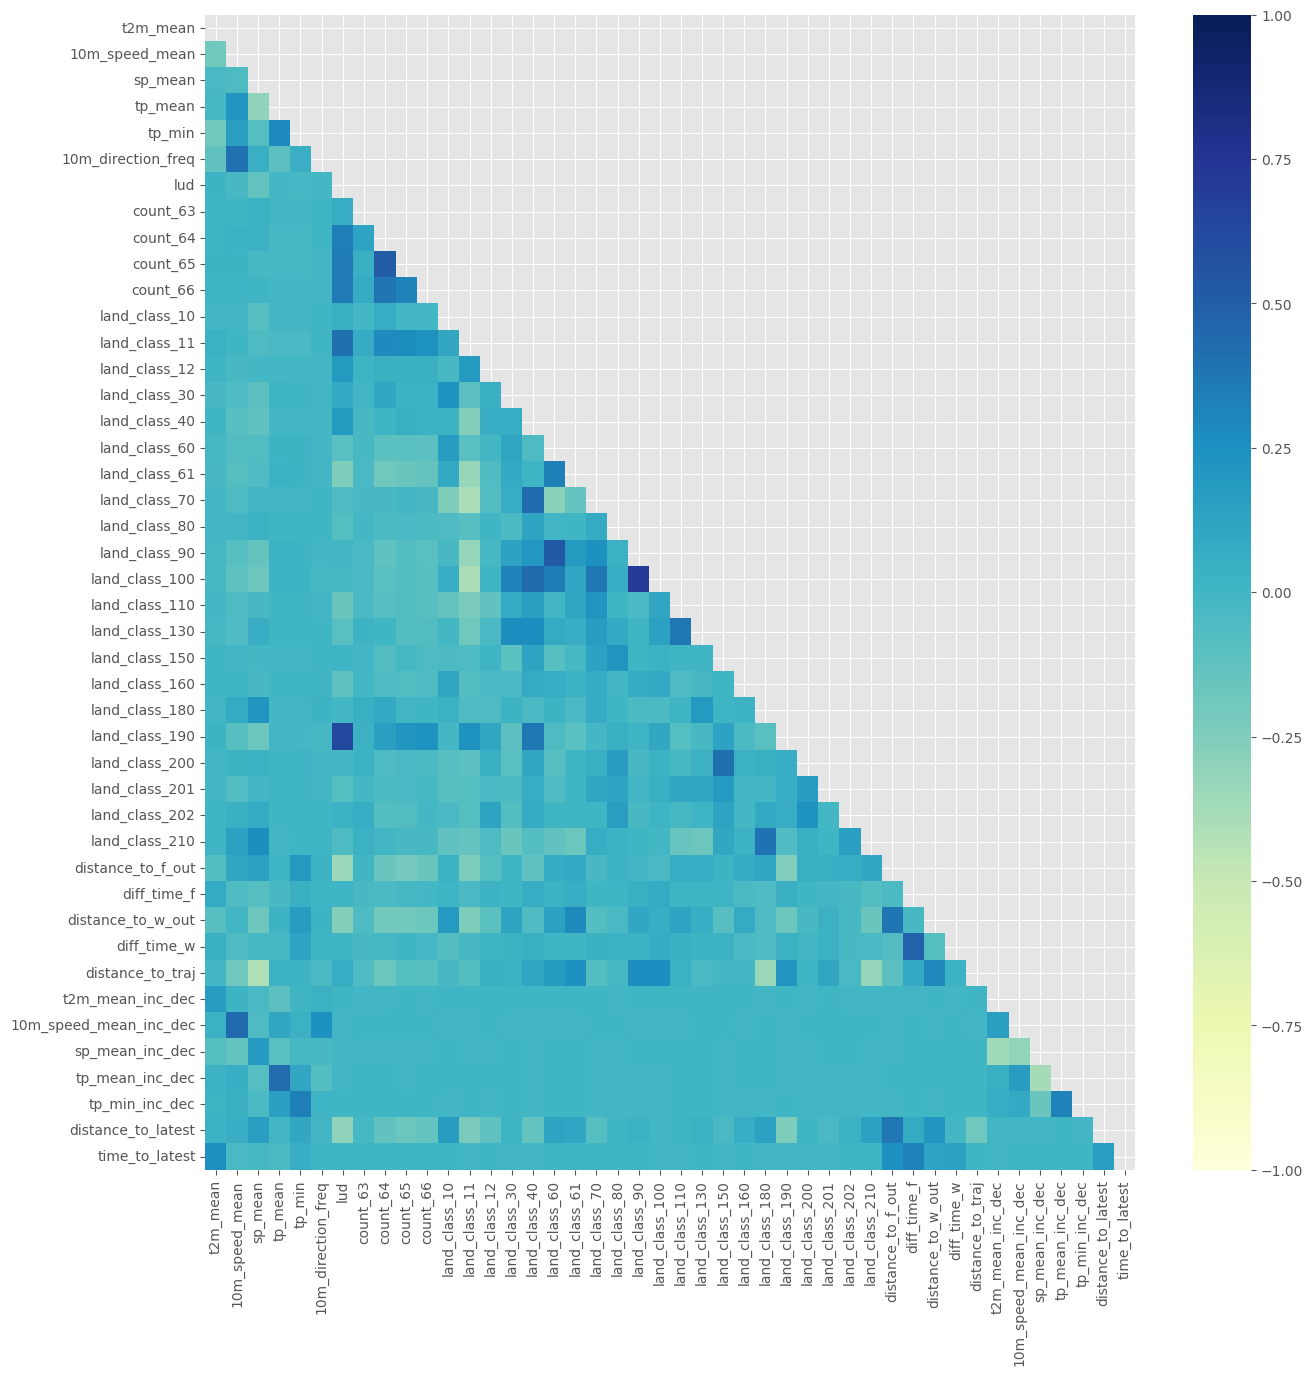

In [21]:
core_matrix = pd.DataFrame(X_con_stand.corr(method='spearman', numeric_only=True))
mask = np.triu(np.ones_like(core_matrix), k = 0)

plt.figure(figsize=(15,15))
heatmap = sb.heatmap(core_matrix, mask = mask, vmin = -1, vmax = 1, cmap="YlGnBu")
plt.show()

In [22]:
result = core_matrix.abs()[(core_matrix.abs() > 0.9)]
for col in result:   
    if result[col].sum() == 1:
        result = result.drop(col)
        result = result.drop(col, axis=1)

        cols = result.columns
col_names = []
result = result.fillna(0)
wspolczynniki_korelacji = []
for i in range(0,result.shape[0]): 
    for j in range(i+1,result.shape[0]):
        if result.iloc[i,j] > 0:
            wspolczynniki_korelacji.append(result.iloc[i,j])
            col_name = cols[i] + '~`' + cols[j]
            col_names.append(col_name)

corr_results = pd.DataFrame.from_dict({'Zmienne' : col_names, 'wspolczynniki_korelacji' : wspolczynniki_korelacji}).set_index('Zmienne')
corr_results.sort_values('wspolczynniki_korelacji', ascending=False, inplace=True)
corr_results.shape

(0, 1)

# Chi-squared Test

### Test wykonany dla danych dyskretnych

In [23]:
chi2_columns = X_dis.columns 
chi2_model = chi2(X_dis,y)
test_score = chi2_model[0]
p_value = chi2_model[1]

chi2_results = pd.DataFrame.from_dict({'Zmienne' : chi2_columns, 'p_value': p_value, 'Wynik testu': test_score}).set_index('Zmienne')
chi2_results.sort_values('p_value',ascending=True,inplace = True)
chi2_results#.round(3)

,p_value,Wynik testu
Zmienne,,
farms_occur_prev,1.146149e-203,927.290732
exist_65,9.290771e-46,201.612057
exist_64,1.442463e-42,186.991242
exist_66,1.755541e-20,86.048749
wild_occur_prev,9.937084e-15,59.908510
10m_dir_W,1.304625e-04,14.635092
10m_dir_E,6.279829e-03,7.468200
10m_dir_NE,1.386684e-02,6.055017
10m_dir_SW,2.984513e-02,4.718191


In [24]:
pvalues = []
statistics = []

for i in range(0,len(X_dis.columns)):  
    table = pd.crosstab(y,X_dis.iloc[:,i]).to_numpy()
    statistic, pvalue, dof, array = stats.chi2_contingency(table)
    
    pvalues.append(pvalue)
    statistics.append(statistic)

f_results = pd.DataFrame.from_dict({'Zmienne' : X_dis.columns, 'p_value': pvalues, 'statistic': statistics}).set_index('Zmienne')
f_results.sort_values('p_value',ascending=True)

,p_value,statistic
Zmienne,,
farms_occur_prev,3.621320e-220,1003.199243
exist_64,1.411012e-68,306.280397
exist_65,1.301858e-63,283.492375
exist_66,3.845358e-25,107.290176
wild_occur_prev,2.284463e-15,62.803037
10m_dir_W,2.055206e-05,18.137439
10m_dir_E,5.528106e-03,7.698032
10m_dir_NE,1.360007e-02,6.089329
10m_dir_SW,2.011537e-02,5.401855


# Informacja wzjemna

## Informacja wzjemna dla zmiennych dyskretnych

Text(0.5, 1.0, 'Informacja wzjemna pomiędzy zmiennymi objaśniającymi a zmienną objaśniana')

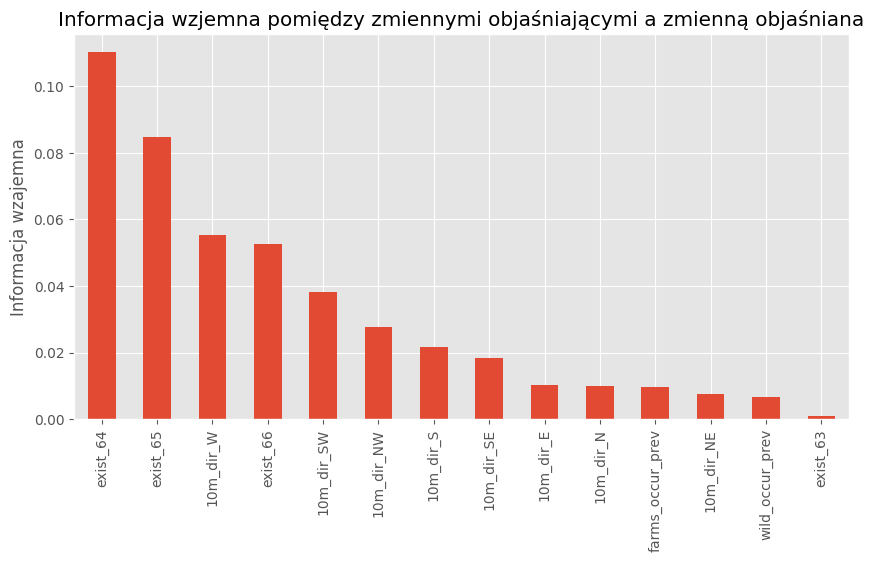

In [25]:
m_i = mutual_info_classif(X_dis, y)
#print(m_i.round(decimals=4))
m_i = pd.Series(m_i)
m_i.index = X_dis.columns
m_i.sort_values(ascending=False).plot.bar(figsize=(10, 5))
plt.ylabel('Informacja wzajemna')
plt.title("Informacja wzjemna pomiędzy zmiennymi objaśniającymi a zmienną objaśniana")

In [26]:
mutual_info  = mutual_info_classif(X_dis, y)


In [27]:
results = pd.DataFrame.from_dict({'Zmienne' : X_dis.columns, 'Informacja wzjemna': mutual_info}).set_index('Zmienne')
results.sort_values('Informacja wzjemna',ascending=False)

,Informacja wzjemna
Zmienne,
exist_64,0.110480
exist_65,0.084868
10m_dir_W,0.055302
exist_66,0.052572
10m_dir_SW,0.038070
10m_dir_NW,0.027530
10m_dir_S,0.021858
10m_dir_SE,0.018248
10m_dir_E,0.010341


In [28]:
mutual_res = results.sort_values('Informacja wzjemna',ascending=False).round(3)
mutual_res.to_csv("mutual_results.csv")

# Fisher exact test

### Test został przeprowadzony na danych typu boolean

In [29]:
#odrzucam kolumne ktora nie daje mozwliwosic stworzenia 2 wymairowej macierzy


col_names = X_dis.columns
p_value_list = []
odd_list = []

for e in X_dis:  
    table = pd.crosstab(y,X_dis[e]).to_numpy()

    odd_ratio, p_value  = fisher_exact(table)
    p_value_list.append(p_value)
    odd_list.append(odd_ratio)

f_results = pd.DataFrame.from_dict({'Zmienne' : col_names, 'p_value': p_value_list, 'odd_ratio': odd_list}).set_index('Zmienne')
f_results.sort_values('p_value',ascending=True)

,p_value,odd_ratio
Zmienne,,
farms_occur_prev,4.618877e-117,10.091957
exist_64,4.185480e-68,5.415178
exist_65,9.981793e-57,4.261762
exist_66,8.316318e-22,2.519396
wild_occur_prev,3.995516e-12,2.592262
10m_dir_W,3.622935e-05,1.526415
10m_dir_E,3.391241e-03,0.554863
10m_dir_NE,8.865876e-03,0.569917
10m_dir_SW,1.947818e-02,1.299937


In [30]:
table = pd.crosstab(y,X_dis['farms_occur_prev']).to_numpy()
table

array([[2024468,  176957],
       [    263,     232]], dtype=int64)

In [31]:
table = pd.crosstab(y,X_dis['wild_occur_prev']).to_numpy()
table

array([[2053267,  148158],
       [    417,      78]], dtype=int64)

# Regresja logistyczna

### Przypadek zastosowania regresji logistycznej na zbiorze zawierającym wszystkie zmienne ciągłe oraz część kolumn z interkacjami między nimi

In [ ]:
#sample_size = 20

poly = PolynomialFeatures(degree = 2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_con_stand)
df = pd.DataFrame(X_poly)
X_poly.shape

In [ ]:
cols = X_con_stand.columns
col_names = cols.to_list()

for i in range(0,44-1):
    for j in range(i+1,44):
        col_name = cols[i] + '*' + cols[j]
        col_names.append(col_name)

### statsmodels.discrete.discrete_model.Logit

In [ ]:
coefficients = []
pvalues = []
#number_of_features = 210
y=y.reset_index(drop=True)
for i in range(0,len(col_names)):
    model = sm.Logit(y,df[i]).fit()
    coef = model.params.iloc[0]
    pvalue = model.pvalues.iloc[0]
    coefficients.append(coef)
    pvalues.append(pvalue)


reg_results2 = pd.DataFrame.from_dict({'Zmienne' : col_names, 'pvalue' : pvalues,'coefficients' : coefficients}).set_index('Zmienne')

Optimization terminated successfully.
         Current function value: 0.674615
         Iterations 10
984
Optimization terminated successfully.
         Current function value: 0.693145
         Iterations 3
985
Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 2
986
Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 2
987
Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 2
988
Optimization terminated successfully.
         Current function value: 0.687009
         Iterations 4
989


In [ ]:
reg_results2['coefficients'] = reg_results2['coefficients'].abs()
reg_results2.sort_values('pvalue', ascending=True, inplace=True)
reg_results2[reg_results2['pvalue'] < 0.05].sort_values('coefficients', ascending=False)

## Bez interakcji

In [ ]:
col_names = X_con_stand.columns.to_list()
coefficients = []
pvalues = []

#number_of_features = 210
y=y.reset_index(drop=True)
for e in  col_names:
    model = sm.Logit(y,X_con_stand[e]).fit()
    coef = model.params.iloc[0]
    pvalue = model.pvalues.iloc[0]
    coefficients.append(coef)
    pvalues.append(pvalue)


reg_results2 = pd.DataFrame.from_dict({'Zmienne' : col_names, 'pvalue' : pvalues,'coefficients' : coefficients}).set_index('Zmienne')


In [ ]:
reg_results2.sort_values(by='pvalue').round(6)